# VOLTAGGI VARIABILI

Misuriamo l'angolo di torsione dovuto alla repulsione delle sfere cariche poste a una distanza fissa (10cm).
Nel primo file sono raccolte torsioni per sfere di uguale carica, nel secondo viene fissata la carica di una sfera e variata la seconda.
siccome considero sull'asse delle x il prodotto tra le cariche concateno le misure.

In [1]:
# importo librerie e dati

import numpy as np
import pandas as pd
import os

dir_path = os.path.abspath('')
FILE_V1_COST_A2 = dir_path + '/../CSV/' + "d_cost_v1_cost_A2.csv"
FILE_V_EQ_A1 = dir_path + '/../CSV/' + "d_cost_v1_eq_v2_A1.csv"

fr1 = pd.read_csv(FILE_V_EQ_A1)
fr2 = pd.read_csv(FILE_V1_COST_A2)

V_fissa = np.array(fr1["V"]) *1000 # V
teta1 = np.array(fr1["teta1"]) #deg
teta2 = np.array(fr1["teta2"])
teta3 = np.array(fr1["teta3"])
v_fissa = V_fissa ** 2  # considero il prodotto delle cariche
teta_fissa = np.array([np.round(np.average([teta1[i], teta2[i], teta3[i]]), 0) for i in range(0, len(teta1))], dtype=np.float64)
sigma_teta_fissa = np.array([np.round(np.std([teta1[i], teta2[i], teta3[i]])/np.sqrt(3), 1) for i in range(0, len(teta1))], dtype=np.float64) # errore standard della media
teta_fissa = teta_fissa * np.pi / 180 #rad
sigma_teta_fissa = sigma_teta_fissa * np.pi / 180 #rad

v_variabile = np.array(fr2["V2"]) * 1000 # V
teta1 = np.array(fr2["teta1"])
teta2 = np.array(fr2["teta2"])
teta3 = np.array(fr2["teta3"])
v_variabile = v_variabile * 6000  # la seconda carica aveva valore fisso 6kV
teta_variabile = np.array([np.round(np.average([teta1[i], teta2[i], teta3[i]]), 0) for i in range(0, len(teta1))], dtype=np.float64)
sigma_teta_variabile = np.array([np.round(np.std([teta1[i], teta2[i], teta3[i]]), 0)/np.sqrt(3) for i in range(0, len(teta1))], dtype=np.float64) # errore standard della media
teta_variabile = teta_variabile * np.pi / 180 # rad
sigma_teta_variabile = sigma_teta_variabile * np.pi / 180 # rad

VV = np.concatenate([v_variabile, v_fissa]) # prodotto delle cariche x
tetas = np.concatenate([teta_variabile, teta_fissa]) # angoli in rad y
sigma_tetas = np.concatenate([sigma_teta_variabile,sigma_teta_fissa]) #sigma_y

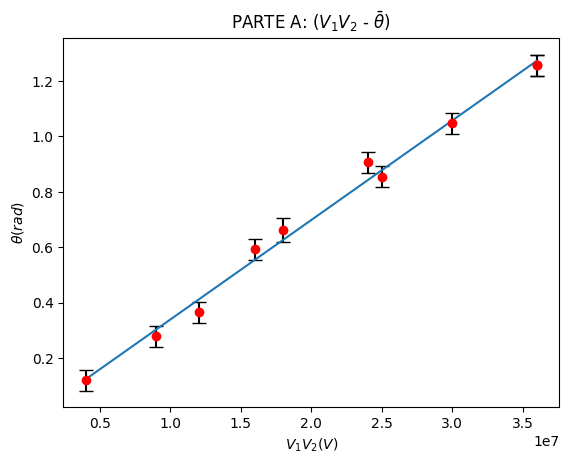


linearità A + BX
    
A: -0.018174193199249233 
B: 3.585513370373655e-08
sigmaA: 0.02603422897538933
sigmaB: 1.1086928567653482e-09

sigmaY: [0.03819132 0.0419904  0.03819132 0.03819132 0.03819132 0.03785752
 0.03939534 0.03720824 0.03720824 0.03881108]
chiquadro ridotto: 0.00225219755743689
df: 8
    



In [2]:
from matplotlib import pyplot as plt
from interpolazione3 import RettaInterpolata

r = RettaInterpolata(VV,tetas,sigma_tetas)

plt.title("PARTE A: ($V_1V_2$ - $\\bar{\\theta}$)")
plt.errorbar(VV,tetas,yerr=r.sigmaY,color='red',fmt='o',ecolor='black',capsize=5)
plt.plot(r.x_best,r.y_best)
plt.xlabel('$V_1V_2 (V)$')
plt.ylabel(f'${chr(92)}theta (rad)$')
plt.show()
print(r)